In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv('motor_colision.csv')

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3
0,03/29/2018,17:40,QUEENS,11435.0,JAMAICA AVENUE,144 STREET,1.0,0.0,1,0,...,0,0,0,Failure to Yield Right-of-Way,No Car Involved,No Car Involved,3872020,Station Wagon/Sport Utility Vehicle,No Car Type,No Car Type
1,03/14/2016,14:45,MANHATTAN,10003.0,3 AVENUE,EAST 13 STREET,1.0,0.0,1,0,...,0,0,0,Unspecified,No Car Involved,No Car Involved,3406298,Bus,No Car Type,No Car Type
2,09/06/2016,22:08,QUEENS,11377.0,ROOSEVELT AVENUE,70 STREET,0.0,0.0,0,0,...,0,0,0,Backing Unsafely,Unspecified,No Car Involved,3514963,Sedan,Sedan,No Car Type
3,05/23/2018,16:16,QUEENS,11417.0,104 STREET,LIBERTY AVENUE,0.0,0.0,0,0,...,0,0,0,Unspecified,Unspecified,No Car Involved,3906228,Sedan,Pick-up Truck,No Car Type
4,02/13/2017,4:00,BRONX,10455.0,3 AVENUE,EAST 149 STREET,0.0,0.0,0,0,...,0,0,0,Turning Improperly,No Car Involved,No Car Involved,3615111,Sedan,No Car Type,No Car Type


In [4]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
dtype: object

In [5]:
df_filtered = df.drop(columns=['CRASH DATE','CRASH TIME','ON STREET NAME','CROSS STREET NAME','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','COLLISION_ID','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3'])

In [6]:
df_filtered

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,QUEENS,11435.0,1.0,1,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1,MANHATTAN,10003.0,1.0,1,0,0,Unspecified,Bus
2,QUEENS,11377.0,0.0,0,0,0,Backing Unsafely,Sedan
3,QUEENS,11417.0,0.0,0,0,0,Unspecified,Sedan
4,BRONX,10455.0,0.0,0,0,0,Turning Improperly,Sedan
...,...,...,...,...,...,...,...,...
11099,BROOKLYN,11226.0,0.0,0,0,0,Other Electronic Device,PASSENGER VEHICLE
11100,QUEENS,11378.0,0.0,0,0,0,Passing Too Closely,trail
11101,BROOKLYN,11236.0,0.0,0,0,0,Driver Inattention/Distraction,PASSENGER VEHICLE
11102,BRONX,10471.0,1.0,1,0,0,Passenger Distraction,SPORT UTILITY / STATION WAGON


In [7]:
df_filtered = df_filtered[~(df_filtered['NUMBER OF PERSONS INJURED']==11)]

In [8]:
vc = df_filtered['ZIP CODE'].value_counts()
rm_vals = vc[vc < 60].index
df_filtered = df_filtered[~df_filtered['ZIP CODE'].isin(rm_vals)]

column_names = ['CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
for i in column_names:
    vc = df_filtered[i].value_counts()
    rm_vals = vc[vc < 200].index
    df_filtered = df_filtered[~df_filtered[i].isin(rm_vals)]





In [9]:
df_filtered

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,QUEENS,11435.0,1.0,1,0,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
2,QUEENS,11377.0,0.0,0,0,0,Backing Unsafely,Sedan
4,BRONX,10455.0,0.0,0,0,0,Turning Improperly,Sedan
6,BROOKLYN,11207.0,1.0,0,1,0,Driver Inattention/Distraction,Sedan
9,BROOKLYN,11236.0,0.0,0,0,0,Unspecified,SPORT UTILITY / STATION WAGON
...,...,...,...,...,...,...,...,...
11091,QUEENS,11420.0,2.0,0,0,2,Unspecified,Sedan
11092,BROOKLYN,11221.0,0.0,0,0,0,Unspecified,SPORT UTILITY / STATION WAGON
11097,BROOKLYN,11212.0,0.0,0,0,0,Unspecified,Sedan
11098,BROOKLYN,11229.0,1.0,0,0,1,Following Too Closely,Station Wagon/Sport Utility Vehicle


In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for i in df_filtered.columns:
    df_filtered[i] = label.fit_transform(df_filtered[i])

df_filtered.head()

,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,3,86,1,1,0,0,2,3
2,3,76,0,0,0,0,0,2
4,0,27,0,0,0,0,7,2
6,1,43,1,0,1,0,1,2
9,1,67,0,0,0,0,8,1


In [11]:
y = df_filtered[['NUMBER OF PERSONS INJURED']]
x = df_filtered.drop(columns = ['NUMBER OF PERSONS INJURED'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 56)

In [13]:
X_train.head()

,BOROUGH,ZIP CODE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
306,0,23,0,0,0,8,2
247,0,35,0,0,0,1,0
2947,0,31,0,0,0,8,0
3324,1,45,0,0,0,8,1
7279,1,53,0,0,1,8,2


In [14]:
y_train.head()

,NUMBER OF PERSONS INJURED
306,0
247,0
2947,0
3324,0
7279,1


In [15]:
if not X_test.index.isin(X_train.index).any():
    print("Training and test datasets are disjoint.")
else:
    print("Training and test datasets are not disjoint.")

Training and test datasets are disjoint.


In [16]:
kernel = ['linear','poly','rbf']
cost = [0.1,1,10]

In [17]:
from sklearn.svm import SVC
result = []
for k in kernel:
    for i in cost:
        cla = SVC(C = i, kernel=k) 
        cla.fit(X_train,y_train)
        accuracy = cla.score(X_test, y_test)
        result.append([k,i,accuracy])

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [18]:
print("{:<10} {:<10} {:<10}".format("Kernel", "Cost", "Accuracy"))

for r in result:
    print("{:<10} {:<10} {:<10}".format(*r))

Kernel     Cost       Accuracy  
linear     0.1        0.9951830443159922
linear     1          0.9971098265895953
linear     10         0.9971098265895953
poly       0.1        0.7312138728323699
poly       1          0.7890173410404624
poly       10         0.896917148362235
rbf        0.1        0.7312138728323699
rbf        1          0.7312138728323699
rbf        10         0.9123314065510597


C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


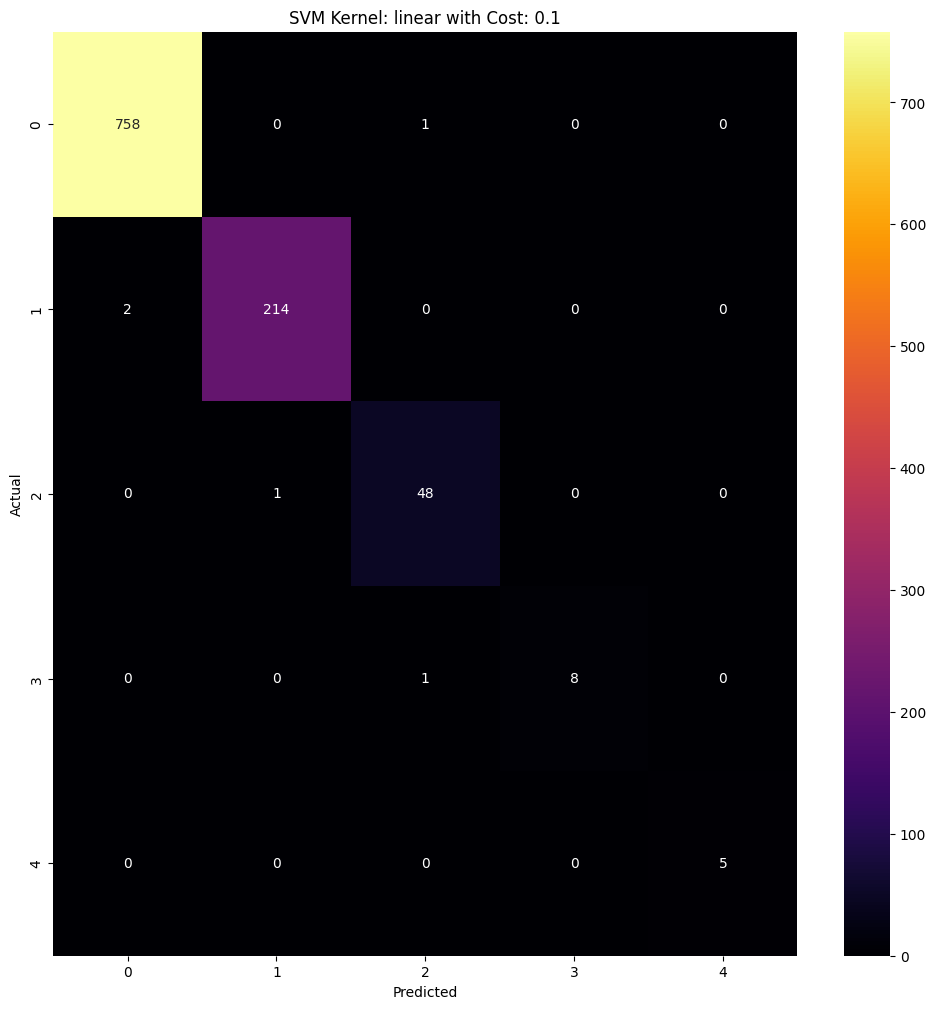

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


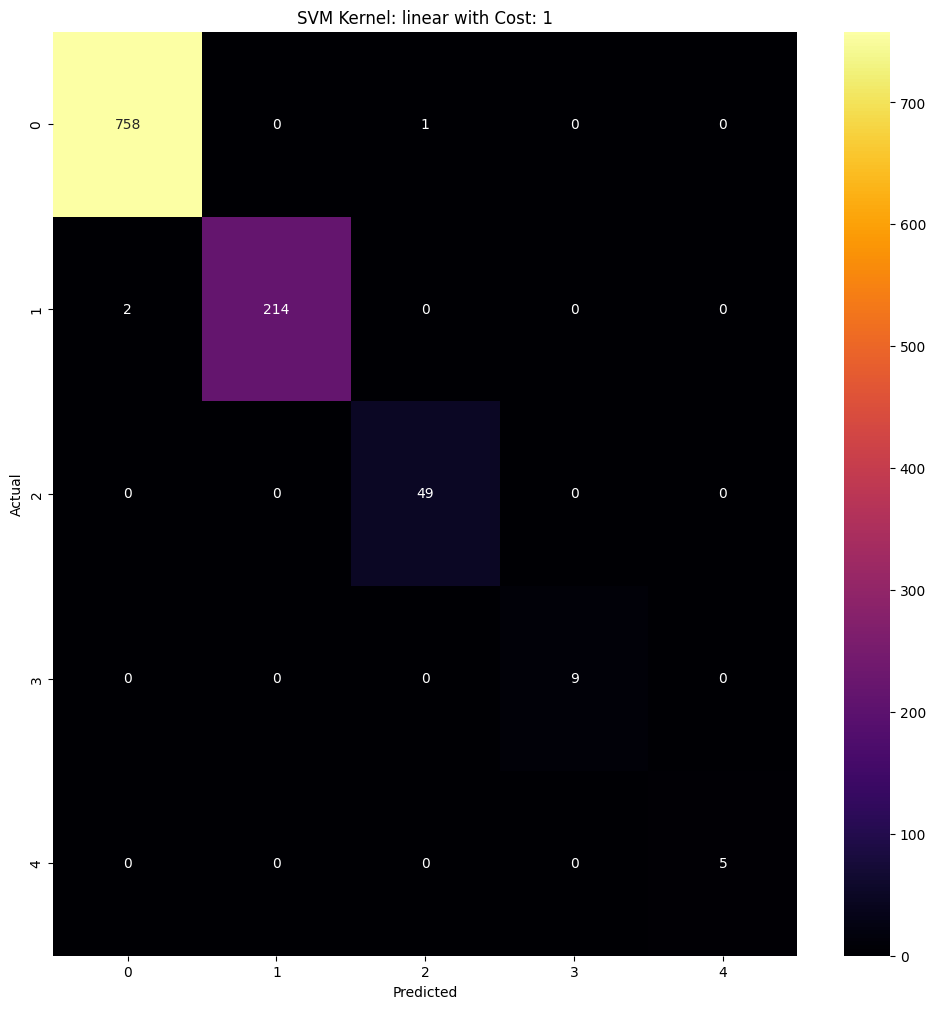

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


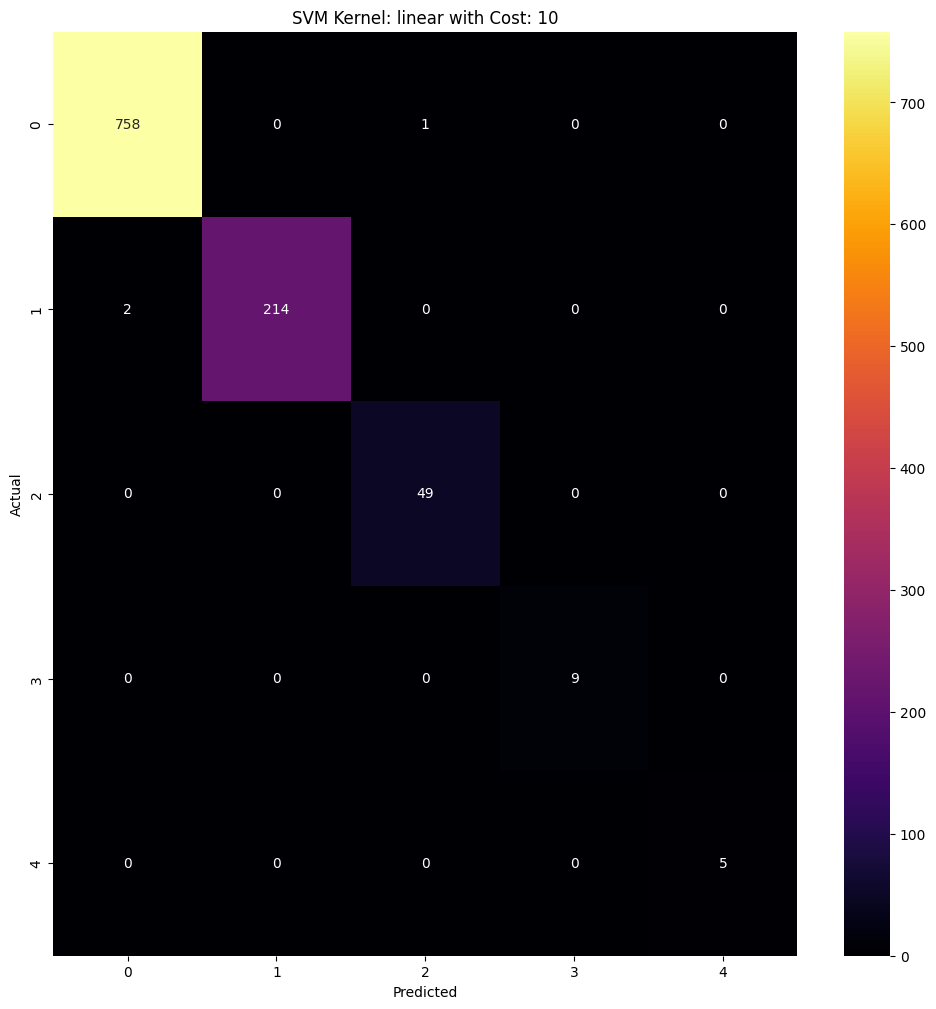

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


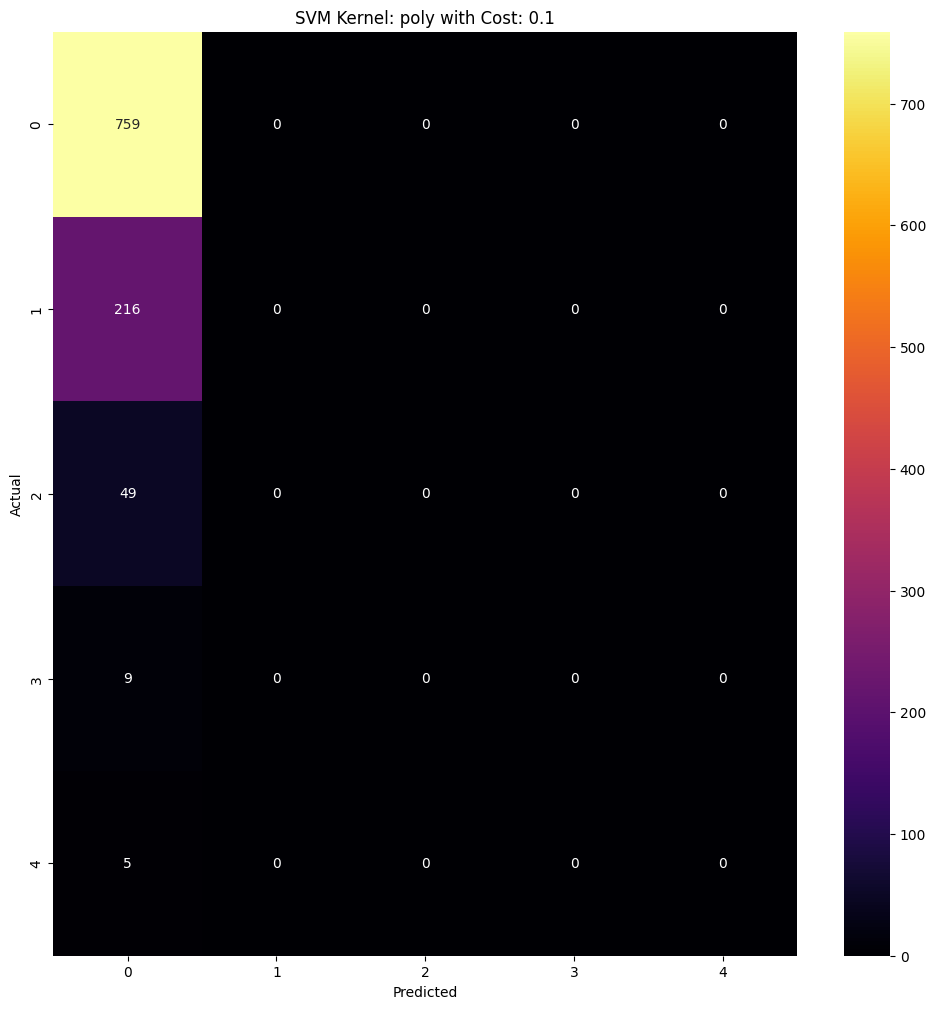

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


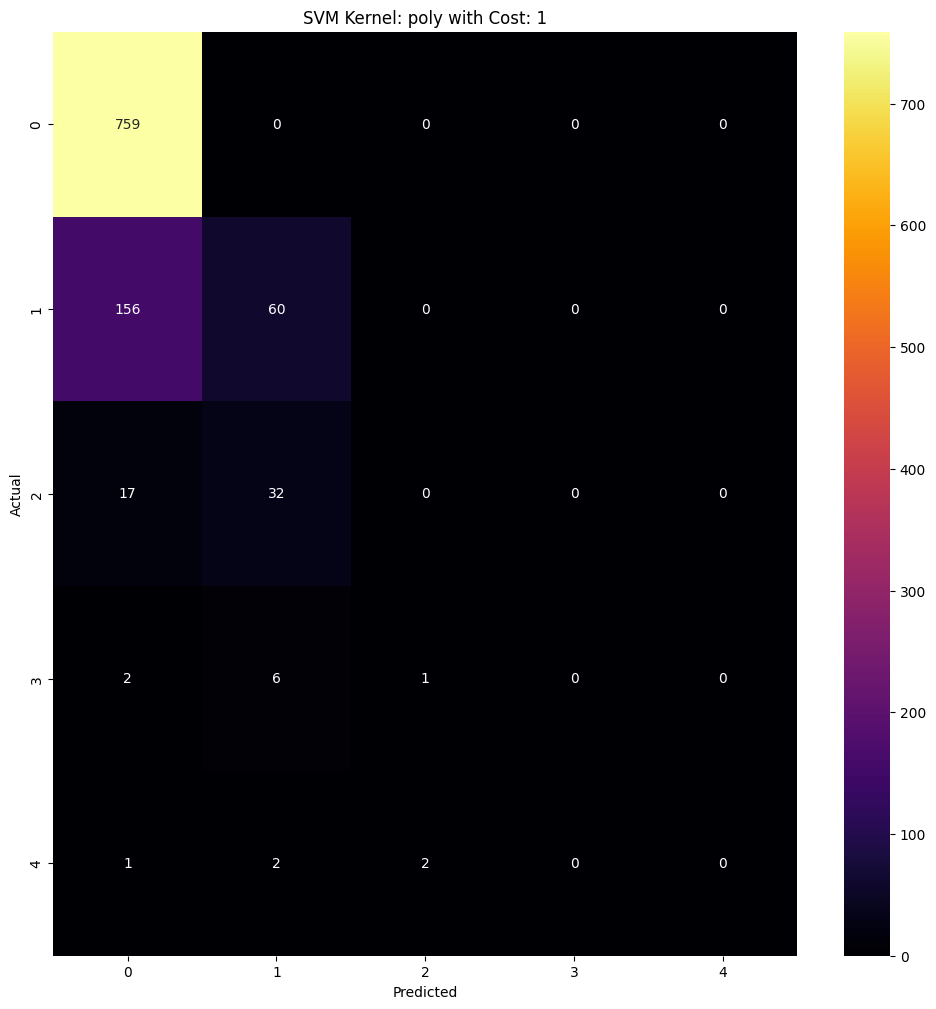

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


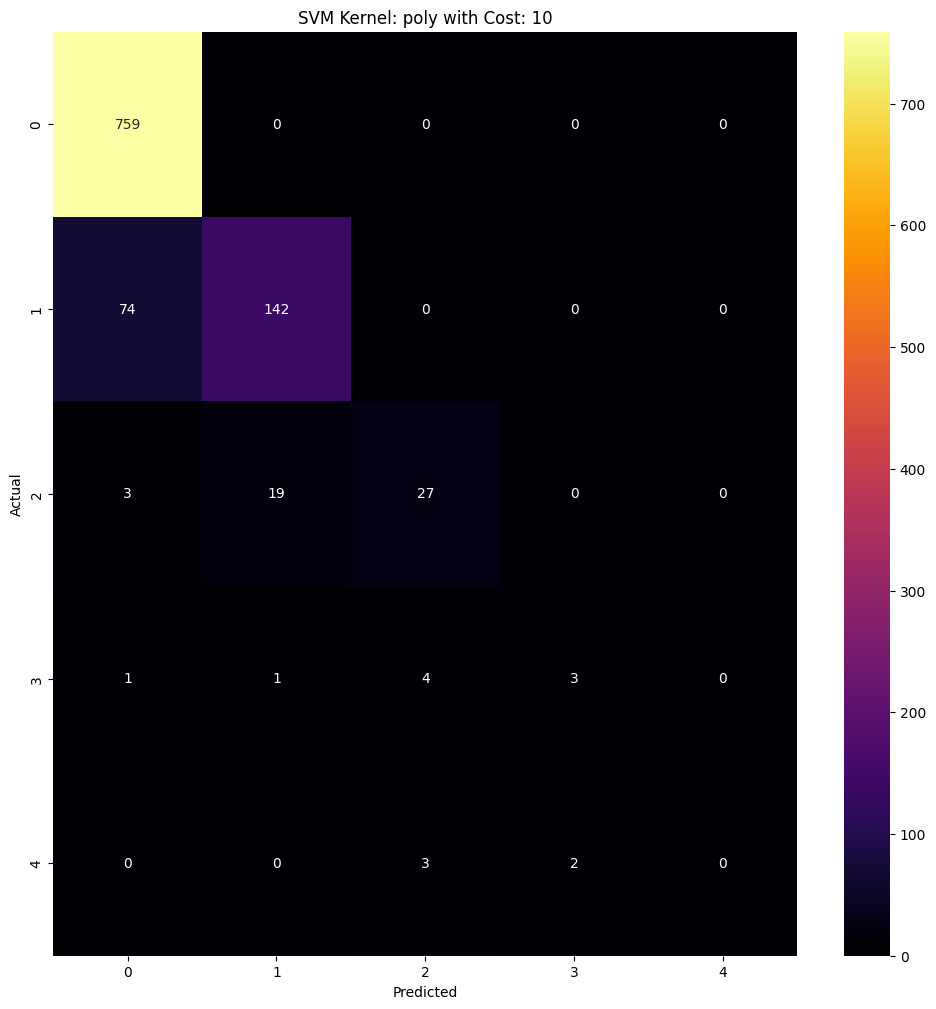

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


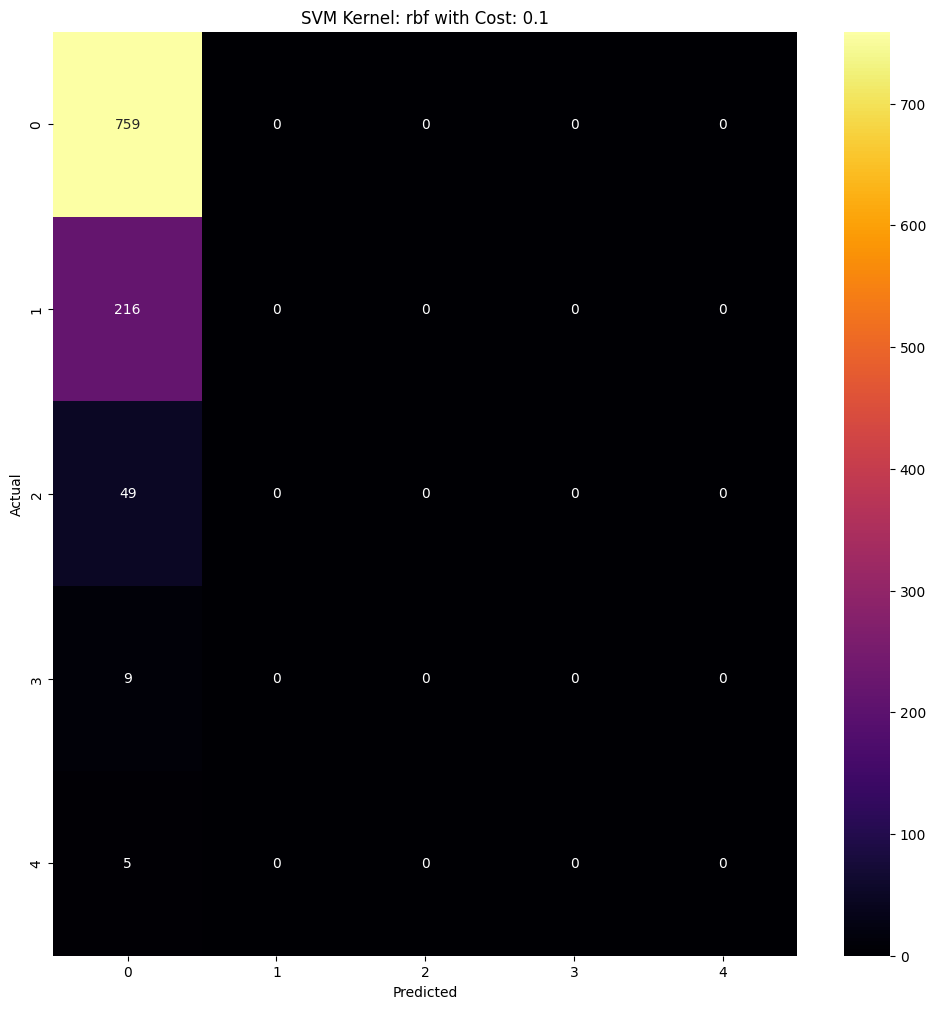

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


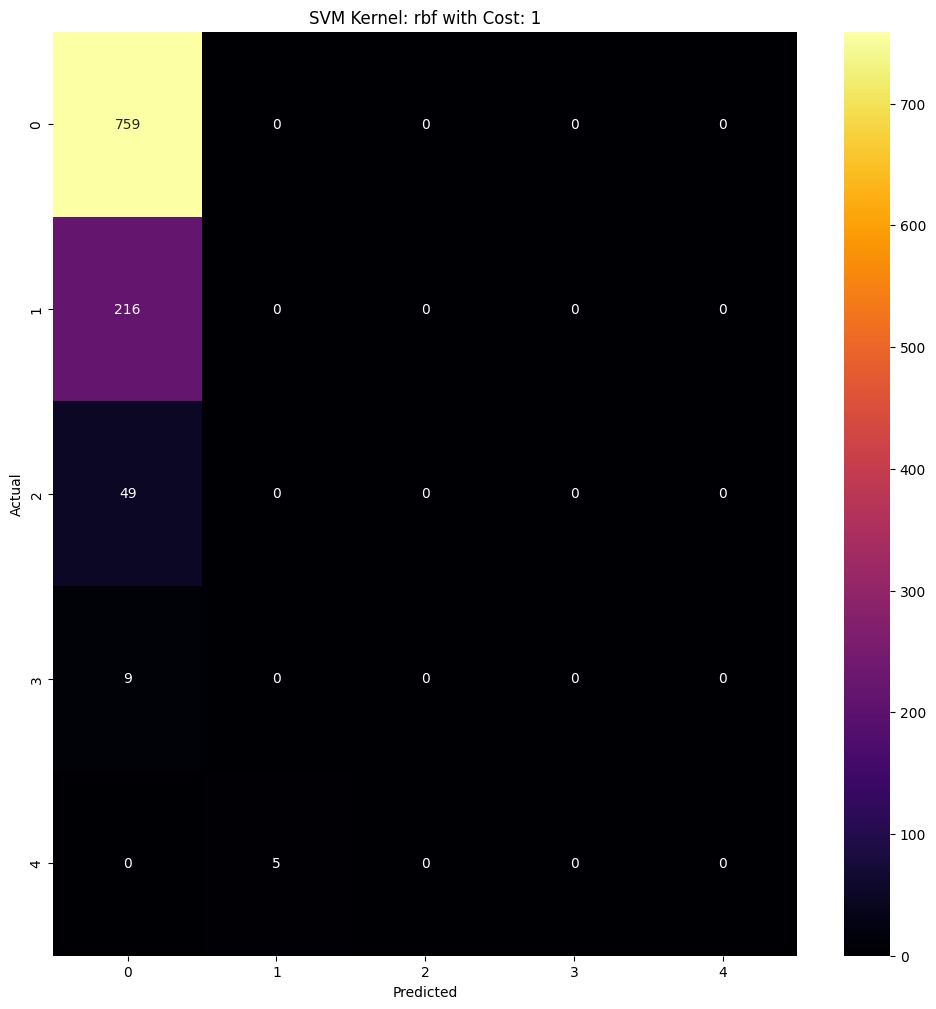

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


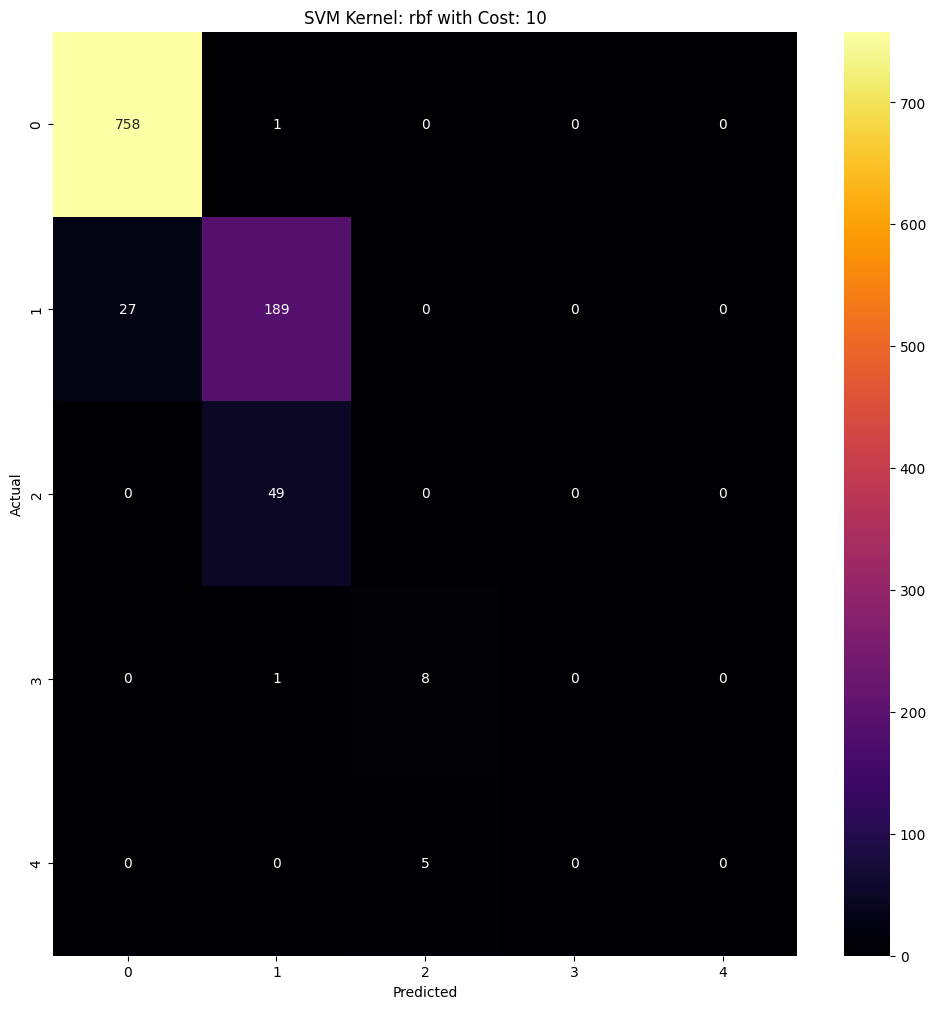

In [19]:
for k in kernel:
    for i in cost:
        cla = SVC(C = i, kernel=k)
        cla.fit(X_train,y_train)
        y_pred = cla.predict(X_test)
        cm = confusion_matrix(y_test.values, y_pred)
        plt.figure(figsize=(12,12))
        sns.heatmap(cm, annot=True, fmt="d", cmap="inferno")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('SVM Kernel: '+ k +' with Cost: '+str(i))
        plt.show()